<a href="https://colab.research.google.com/github/Jnyambok/Python-Utility-Functions/blob/main/Python_Utility_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Python Utility Functions, Algorithms and Data Structures**
This notebook serves as a playground for playing with python utility functions.
Adapted from various sources such as :

1.   [How to Define Python Utility Functions](https://labex.io/tutorials/python-how-to-define-python-utility-functions-419853)
2.    [Problem Solving with Algorithms and Data Structures using Python](https://runestone.academy/ns/books/published/pythonds/index.html)

The best practices for functions are:


1.  Keep functions focused on a single task
2.  Use clear and descriptive names
3.  Use type hints and docstrings
4.  Handle potential edge cases
5.  Prefer pure functions when possible

Effective utility functions should have:

1.   A single, well-defined responsibility
2.   Clear input and output expectations.
3.    Minimal side effects



# **1. Docstrings**

**Docstrings** short for documentation strings provide a convenient way of associating documentation with Python Modules, functions, classes and methods.
They are declared using triple quotes and can be accessed using the __doc__ method of an object or using the help function.

In [ ]:
def addition():
  """
  Demonstrates the triple double quotes docstrings and does nothing really

  """

  return None

print(addition.__doc__)
help(addition)

Help on function addition in module __main__:

addition()
    Demonstrates the triple double quotes docstrings and does nothing really



# New section

Google Style docstrings follow a specific format and provide a structured way to document Python Code including parameters, return values and descriptions

In [ ]:

def multiply_numbers(a,b):

  """
  Multiplies two numbers and returns the result

  Args:
  a (int) : The first number
  b (int) : The second number

  Returns:
  int : The product of the two numbers
  """

  return a*b


print(multiply_numbers(3,5))
help(multiply_numbers)


15
Help on function multiply_numbers in module __main__:

multiply_numbers(a, b)
    Multiplies two numbers and returns the result
    
    Args:
    a (int) : The first number
    b (int) : The second number
    
    Returns:
    int : The product of the two numbers



# **2. Function Design Patterns**
A good function should have error handling, type hinting, documentation strings and input validation
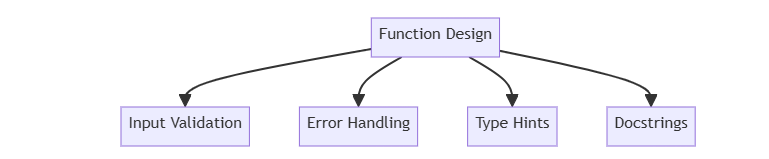

### Type Hints

In my own words, Type Hints borrows a little bit from static-typed language where it implements the functionality of being able to specify variable types before running.
Type Hinting provides a clear expectation of the variable types as one is defining the method.
In Python, Numeric Abstract Base Classes (ABCs) are a set of classes provided in the built-in numbers module. They define a standard hierarchy for different types of numbers, allowing you to check if an object behaves like a particular kind of number, regardless of its specific concrete class.

It does have some pitfalls that you would look at for [
  here](https://www.reddit.com/r/Python/comments/10zdidm/why_type_hinting_sucks/)



In [ ]:
## Lets define a simple function that returns the number of char in a name

def count_chars(name: str) -> int:
  """
  Definition : A function that takes in the name of a person and returns the number of characters

  Args:
  name (str) : The name of the person

  Returns:
  int : The number of characters in the name

  """

  return len(name)

help(count_chars)

Help on function count_chars in module __main__:

count_chars(name: str) -> int
    Definition : A function that takes in the name of a person and returns the number of characters
    
    Args: 
    name (str) : The name of the person
    
    Returns:
    int : The number of characters in the name



In [ ]:
count_chars("Julius")

6

### Exception Handling and Input Validation
Write a program that separates the quantity from the item i.e 2 x Mushrooms to a df having Item | Quantity. And if its just a string it list just 1 as quantity

In [ ]:
import pandas as pd
import re

sku = ["2 x Tropical Heat Cumin" , "3 x Tomatoes" , "1 x Onion", "Crisps"]
shopping_list = pd.DataFrame(columns = ["Item" , "Quantity"])

def item_splitter (items_list : list[str]) -> pd.DataFrame :
  """
  Definition : A function that takes a product list and separates the item from the quantity

  Args:
  list (str) : String of items

  Returns:
  DataFrame : A dataframe with the item and quantity

  """
  if not isinstance(items_list, list):
    raise TypeError("Input 'items_list' must be a list.")

  for item in items_list:
    try:
      match = re.match(r'^\s*(\d+)\s*x\s*(.*)$', item)
      if match:
        item_number = int(match.group(1))
        item_name = match.group(2)
      else:
        item_number = 1
        item_name = item

      shopping_list.loc[len(shopping_list)] = [item_name, item_number]

    except Exception as e:
      print(f"Error processing item '{item}': {e}")

  return shopping_list

item_splitter(sku)




,Item,Quantity
0,Tropical Heat Cumin,2
1,Tomatoes,3
2,Onion,1
3,Crisps,1


In [ ]:
import pandas as pd
import re
from typing import List

# Define your input data (sku list) in the global scope.
# This list is *not* modified by the pure function, so it's fine.
sku = ["2 x Tropical Heat Cumin", "3 x Tomatoes", "1 x Onion", "Crisps"]

def item_splitter_pure(items_list: List[str]) -> pd.DataFrame:
    """
    Definition : A pure function that takes a product list and separates the item from the quantity

    Args:
        items_list (List[str]): List of item strings (e.g., "2 x Tropical Heat Cumin").

    Returns:
        pd.DataFrame: A new DataFrame with 'Item' and 'Quantity' columns.
    """
    if not isinstance(items_list, list):
        raise TypeError("Input 'items_list' must be a list.")

    # Create a new DataFrame *inside* the function's scope for each call
    rows_to_add = [] # Collect rows to add at once for efficiency

    for item_str in items_list:
        try:
            match = re.match(r'^\s*(\d+)\s*x\s*(.*)$', item_str)
            if match:
                quantity = int(match.group(1))
                item_name = match.group(2).strip()
            else:
                quantity = 1
                item_name = item_str.strip()

            rows_to_add.append({"Item": item_name, "Quantity": quantity})

        except Exception as e:
            # For a pure function, printing is a side effect.
            # In a real application, you might log this, or return an error indicator
            # within the DataFrame or a separate error list.
            print(f"Error processing item '{item_str}': {e}")

    # Create the DataFrame and return it
    result_df = pd.DataFrame(rows_to_add, columns=["Item", "Quantity"])
    return result_df

# Now, call the pure function, passing the 'sku' list as an argument
my_shopping_list_df = item_splitter_pure(sku)

print(my_shopping_list_df)

# If you call it again, you get a fresh, identical DataFrame
my_shopping_list_df_2 = item_splitter_pure(sku)
print("\nSecond call (should be identical):")
print(my_shopping_list_df_2)

                  Item  Quantity
0  Tropical Heat Cumin         2
1             Tomatoes         3
2                Onion         1
3               Crisps         1

Second call (should be identical):
                  Item  Quantity
0  Tropical Heat Cumin         2
1             Tomatoes         3
2                Onion         1
3               Crisps         1


OOP also exists in other programming languages and is often described to center around the four pillars, or four tenants of OOP:

  1. Encapsulation allows you to bundle data (attributes) and behaviors (methods) within a class to create a cohesive unit. By defining methods to control access to attributes and its modification, encapsulation helps maintain data integrity and promotes modular, secure code.

  2. Inheritance enables the creation of hierarchical relationships between classes, allowing a subclass to inherit attributes and methods from a parent class. This promotes code reuse and reduces duplication.

  3. Abstraction focuses on hiding implementation details and exposing only the essential functionality of an object. By enforcing a consistent interface, abstraction simplifies interactions with objects, allowing developers to focus on what an object does rather than how it achieves its functionality.

  4. Polymorphism allows you to treat objects of different types as instances of the same base type, as long as they implement a common interface or behavior. Python’s duck typing make it especially suited for polymorphism, as it allows you to access attributes and methods on objects without needing to worry about their actual class.


In [ ]:
class Hen:
    def __init__(self, name): # 1. 'name' is passed as an argument
        self.name = name   # 2. Using '_' convention for a "protected" attribute
                            # This indicates it's an internal detail,
                            # though still accessible if you really try.

    def make_sound(self): # 3. 'self' is the first argument
        return f"{self.name} is clucking" # 4. Accessing the internal name

    def get_name(self): # Optional: A getter method to access the name safely
        return self.name

# Creating an instance of the Hen class
baby_chick = Hen("Chicky")

# Accessing the method which operates on the internal data
print(baby_chick.make_sound())

# You can still directly access _name, but the '_' signals
# that you generally shouldn't directly modify it from outside.
# This demonstrates encapsulation by bundling the data (_name)
# and the method (make_sound) that operates on it.
print(f"The chick's name is: {baby_chick.get_name()}")

Chicky is clucking
The chick's name is: Chicky


# **3. Abstraction**

**Abstraction** allows you to hide internal details of a class and only exposing what is needed.
**Private attributes** can only be accessed within the class and should not be accessed from outside the class. However, it is important to note that the double underscore syntax is just a convention and not a strict rule.
The idea behind private attr:

  1. This is typically for methods/attributes that are strictly internal to the class and are unlikely to be used or overridden by subclasses.
  2. It's a stronger signal: "Keep your hands off! This is purely for the internal workings of this specific class."

Mostly for internal use, please be careful if accessing externally or in subclasses.
Can be accessed if someone specifically creates a function or means to access it


In [ ]:
from typing_extensions import reveal_type
class SecretKeeper:
  def __init__(self,secret_data):
    self.__secret_data = secret_data    ##Only this class should manage it

  def reveal_secret(self):
    return f"The secret is: {self.__get_processed_secret()}"

  def __get_processed_secret(self):
    #private method: internal processing not for external calls
    return self.__secret_data.upper()


keeper =  SecretKeeper("My secret")
print(keeper.reveal_secret())



The secret is: MY SECRET


In [ ]:
# Attempting direct access will fail because of name mangling:
#print(keeper.__secret_data)
# AttributeError: 'SecretKeeper' object has no attribute '__secret_data'

In [ ]:
class Person:
  def __init__(self,name,age):
    self.__private_attribute = age
    self.name = name

  def get_private_attribute(self):
    return self.__private_attribute

person = Person("John",30)
print(person.get_private_attribute())
print(person.__private_attribute)  ## will raise an error

30


AttributeError: 'Person' object has no attribute '__private_attribute'

In [ ]:
class Hen: #Grandmother Hen
    def __init__(self,name):
        self._name = name

    def make_sound(self):
        return f"{self._name} is clucking"

    def get_name(self):
        return self._name

class Chicky(Hen): # BabyChick inherits from Hen
    def __init__(self, name):
        # Call the parent class's constructor to initialize inherited attributes
        super().__init__(name) # This calls Hen's __init__ method

    def make_sound(self):
        # Baby chicks don't cluck, they peep! This is method overriding.
        return f"{self._name} is peeping"

# Now let's see it in action:
print("--- Inheritance Example ---")
mother_hen = Hen("Grandmother Hen")
print(f"Parent (Grandmother): {mother_hen.make_sound()}")

baby_chick = Chicky("Henrietta")
print(f"Grandchild: {baby_chick.make_sound()}") # Notice it calls Chicky's make_sound
print(f"GrandChild's name via inherited method: {baby_chick.get_name()}") # Uses Hen's get_name

--- Inheritance Example ---
Parent (Grandmother): Grandmother Hen is clucking
Grandchild: Henrietta is peeping
GrandChild's name via inherited method: Henrietta


In this example, the Person class has a private attribute __private_attribute that holds the person's age. The class has a public method get_private_attribute that returns the value of the private attribute. When trying to access the private attribute directly from outside the class, an AttributeError is raised, indicating that the attribute is not accessible. This protects the private attribute from being accidentally or intentionally modified from outside the class, maintaining the integrity of the class.

**Protected (_)**: "Internal use, please be careful if accessing externally or in subclasses." (Soft hint).
Meaning:

1. It's a strong hint to other developers: "This is an internal detail. Don't access or modify this directly from outside the class, or from subclasses unless you know exactly what you're doing."
2. It means: "I might change how this works internally without warning, so don't build external code that depends on it."

In [ ]:
class Person:
  def __init__(self,name,age):
    self._protected_attribute = "This is protected"
    self.name = name
    self.age = age

class Employee (Person):
  def display_protected_attribute(self):
    print(self._protected_attribute)


employee = Employee('Jane Doe',25)
employee.display_protected_attribute()
employee._protected_attribute

This is protected


'This is protected'

# **4. Polymorphism**

Polymorphism can be translated loosely to "many forms" A class can define an abstract method that can take many implementations

***When to Use Polymorphism Instead***

Instead of using a switch statement, we should refactor the design to leverage polymorphism if the number of cases is expected to grow. Here’s how:

1. Define an abstract base class or interface for payment processing.
2. Implement concrete classes for each payment type.
3. Use dependency injection or a factory to instantiate the correct class.

In [ ]:
from abc import ABC, abstractmethod # Import ABC and abstractmethod

class Device(ABC):

  @abstractmethod
  def start_device(self):
    pass

class electrical_vehicle(Device):
  def start_device(self):
    print("This EV is on the road")

class microwave(Device):
  def start_device(self):
    print("This microwave is working fine")

ev = electrical_vehicle()
mw = microwave()

ev.start_device()
mw.start_device()

devices = [electrical_vehicle(), microwave()]
for d in devices:
  d.start_device()

This EV is on the road
This microwave is working fine
This EV is on the road
This microwave is working fine


In [ ]:
from abc import ABC,abstractmethod

class SchoolBird(ABC):
  def __init__(self,name):
    self._name = name

  @abstractmethod
  def make_sound(self):
    #This is an abstract method
    #Any class (other bird species) inheriting
    ##MUST provide an implementation to how they want to make their own sound)
    pass

  @abstractmethod
  def introduce_self(self):
    #Another - method - every school bird must introduce oneself
    pass

  def get_name(self): #A concrete getter method that will inherit in the same way
    return self._name


# Now, our Chicky, Crow, and Duck classes must inherit from SchoolBird
# and implement its abstract methods.

class Chicky(SchoolBird):
  def __init__(self,name):
    super().__init__(name)

  def make_sound(self): #Polymorphism - each bird has its own way of making a sound
    return f"{self._name} is peeping!"

  def introduce_self(self): #Abstraction too! - Every bird is hiding how they introduce themselves
    return f"Hi, I'm {self._name}. I'm a Chicky."


class Crow(SchoolBird):
  def __init__(self,name):
    super().__init__(name)

  def make_sound(self): #Polymorphism - each bird has its own way of making a sound
    return f"{self._name} is cawing! Beware of my might!"

  def introduce_self(self): #Abstraction too! - Every bird is hiding how they introduce themselves
    return f"I'm {self._name}. Maths is my strongest subject."


class Duck(SchoolBird):
  def __init__(self,name):
    super().__init__(name)

  def make_sound(self): #Polymorphism - each bird has its own way of making a sound
    return f"{self._name} is quacking!"

  def introduce_self(self): #Abstraction too! - Every bird is hiding how they introduce themselves
    return f"{self._name} is my name. Nobody can swim faster than I."


print("\n--- Abstraction and Polymorphism in Action: School Bird Introductions ---")

chick_student = Chicky("Henrietta")
crow_student = Crow("Mighty Crow")
duck_student = Duck("Scrouge McDuck")

student_roster = [chick_student, crow_student, duck_student]
for student in student_roster:
    print(student.introduce_self())
    print(student.make_sound(),'\n') # And make their characteristic sound!



--- Abstraction and Polymorphism in Action: School Bird Introductions ---
Hi, I'm Henrietta. I'm a Chicky.
Henrietta is peeping! 

I'm Mighty Crow. Maths is my strongest subject.
Mighty Crow is cawing! Beware of my might! 

Scrouge McDuck is my name. Nobody can swim faster than I.
Scrouge McDuck is quacking! 



# **5.Inheritance**
 Inheritance establishes an "is-a" relationship.
 inheritance involves creating a parent-child relationship between two classes. The child inherits properties and behaviors from its parent, acquiring predefined characteristics without manual intervention


Occasionally, you might desire direct access to a parent’s private members. While encapsulation discourages tampering with internal states, certain situations warrant circumvention. Python provides two alternatives for reaching beyond immediate scope: super() and parent_class.__function__(instance).

In [ ]:
##Accessing private methods using Super
class Animal:
    def speak(self):
        raise NotImplementedError('speak')


class Mammal(Animal):
    def __give_birth(self):
        return 'Born alive.'

class Dog(Mammal):
    def speak(self):
        return 'Woof!'

doggy = Dog()
print (doggy.speak())
#print(super(Dog, doggy).give_birth())

Woof!


### Multiple Inheritance

In [ ]:
class Swim:
  def swimming(self):
    return "I can fly"


class Fly:
  def flying(self):
    return "oh and fly too"


class Duck(Swim,Fly):
  pass

duck = Duck()
print(duck.swimming())
print(duck.flying())

I can fly
oh and fly too


# **6. Formatting Text ( #10 on 100 days of Python)**
**a) Using the .format method**

In [ ]:
#Using the format method
stance = "Must Go Now"
print (" That guy {}".format(stance))

 That guy Must Go Now


**b) Using the % operator**

In [ ]:
#Using the % operator
stance = " I said that we must fight for our country"
print("%s. Must go now!" %stance)

 I said that we must fight for our country. Must go now!


**c) Using the f-strings**


In [ ]:
stance = "nchi yetu ya Kenya"
print(f'I love my country.{stance}')

I love my country.nchi yetu ya Kenya


# **7. Data Structures: Lists ( #11)**
**Lists** are used for ordered collection of items

In [ ]:
number = [1,2,3,4,5]
print(f'This is a list of numbers: {number}')

#The append() method allows you to add an item to the end of a list
names = ['Bob','Charles']
names.append('Cynthia')
print(f'These are the new names: {names}')
names.remove('Bob')
print(f'These are the new names: {names}')
#The del statement is a powerful way to remove items from a list.
#You can use it to remove a specific item by its index, or to remove a range of items:
del number[0]
print(f'These are the new names: {number}')

This is a list of numbers: [1, 2, 3, 4, 5]
These are the new names: ['Bob', 'Charles', 'Cynthia']
These are the new names: ['Charles', 'Cynthia']
These are the new names: [2, 3, 4, 5]




# **8. What is the range() function in Python? ( #11)**
The range() function is a built-in function in Python that returns a sequence of numbers, starting from 0 by default, increments by 1 (also by default), and ends at a specified number. It's commonly used in loops to repeat an action a certain number of times (we’ll cover loops in the next tutorial).

The range function accepts a parameter indicating where it should stop (excluding the indicated number). It can be customized to start from a different than 0. Besides, it can also be customized to increment by a different number. By default, the range() function increments the values by 1, but it can be changed to increment those by 2, 3, or even a negative number like -1.

In [ ]:
print(list(range(0,10,2)))

[0, 2, 4, 6, 8]


# **8. For Loops? ( #13)**
A for loop is a type of control flow statement that allows you to iterate over a sequence of items, such as a list, a string, or a range. The basic syntax of a for loop includes a variable that represents the item of the sequence on each iteration, the sequence itself, and the code that needs to be executed for each item of the sequence



```
for item in sequence:
    # code to be executed on each iteration
```

for loop: For iterating over sequences. Repeats a block of code for each item in a list, string, range, etc.

    Short: "Do this FOR every item in that list."

In [ ]:
numbers = [1,2,3,4,5]
for num in numbers:
  print(num+3)

4
5
6
7
8


# **8. While Loops? ( #14)**

while loop: For repeated execution as long as a condition is true. Repeats a block of code as long as a specified condition remains true.

    Short: "Keep doing this WHILE that condition is true."
the break statement is used to exit or break out of a loop early, before the loop has finished iterating through all of its items.
 This can be useful when you have a certain condition that you want to check for, and if that condition is met, you want to stop the loop and move on to the next section of your code.

In [ ]:
count = 10
while True:
    print(count)
    count -= 1
    if count == 0:
        break


10
9
8
7
6
5
4
3
2
1


# **9. Break and Continue? ( #15)**

In Python, the break statement is used to exit or break out of a loop early, before the loop has finished iterating through all of its items. This can be useful when you have a certain condition that you want to check for, and if that condition is met, you want to stop the loop and move on to the next section of your code. It can be used with a for loop:

In [ ]:
lucky_number = 11  # Our lucky nymber
submitted_numbers = [24, 2, 4, 6, 22, 11, 3, 1]

for num in submitted_numbers:
    if num == lucky_number:
        print('🎉 We have a winner! Raffle #', num)
        break
    print('Raffle #', num, 'is not our winner.')
else:
    print('🤷‍♂️ All tickets checked.!')

print("\n--- End of Scenario 2 ---\n")

Raffle # 24 is not our winner.
Raffle # 2 is not our winner.
Raffle # 4 is not our winner.
Raffle # 6 is not our winner.
Raffle # 22 is not our winner.
🎉 We have a winner! Raffle # 11

--- End of Scenario 2 ---



### Continue
In addition to break statement, Python also has continue statement which is used to continue to the next iteration of the loop without executing the rest of the code in the current iteration. This can be useful when you have a certain condition that you want to check for, and if that condition is met, you want to skip the current iteration of the loop without stopping the loop entirely:

In [ ]:
count = 0

for i in range(156,179):
    count += 1
    if i == 160:
        continue
    print(i)
print("The number of time it has run is ",count)

156
157
158
159
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
The number of time it has run is  23


# **10. Python had a keyword called nobreak? ( #16)**
That's an interesting tidbit! You're right, there was indeed a proposal and discussion around a nobreak keyword in Python, related to how else clauses behave with for and while loops
It’s important to note that the else block will only be executed if the loop completes its execution normally. If the loop is exited prematurely using a break statement, the else block will not be executed.

In [ ]:
lucky_number = 11  # Our lucky nymber
submitted_numbers = [24, 2, 4, 6, 22, 11, 3, 1]

for num in submitted_numbers:
    if num == lucky_number:
        print('🎉 We have a winner! Raffle #', num)
        break
    print('Raffle #', num, 'is not our winner.')
else:
    print('🤷‍♂️ All tickets checked.!')




Raffle # 24 is not our winner.
Raffle # 2 is not our winner.
Raffle # 4 is not our winner.
Raffle # 6 is not our winner.
Raffle # 22 is not our winner.
🎉 We have a winner! Raffle # 11


In [ ]:
lucky_number = 99  # A number NOT in the list
submitted_numbers = [24, 2, 4, 6, 22, 11, 3, 1]

print("--- Scenario 1: Searching for a non-existent lucky number ---")
for num in submitted_numbers:
    if num == lucky_number:
        print('🎉 We have a winner! Raffle #', num)
        break  # This 'break' is NEVER reached
    print('Raffle #', num, 'is not our winner.') # This prints for every non-winning ticket
else:
    # This block executes ONLY because the loop finished all its iterations
    # without hitting a 'break'. This is the 'nobreak' scenario.
    print('🤷‍♂️ All tickets checked. No winner found in this batch!')

print("\n--- End of Scenario 1 ---\n")

--- Scenario 1: Searching for a non-existent lucky number ---
Raffle # 24 is not our winner.
Raffle # 2 is not our winner.
Raffle # 4 is not our winner.
Raffle # 6 is not our winner.
Raffle # 22 is not our winner.
Raffle # 11 is not our winner.
Raffle # 3 is not our winner.
Raffle # 1 is not our winner.
🤷‍♂️ All tickets checked. No winner found in this batch!

--- End of Scenario 1 ---



In [ ]:
lucky_number = 11  # Our lucky number
submitted_numbers = [24, 2, 4, 6, 22, 11, 3, 1]

for num in submitted_numbers:
    if num == lucky_number:
        print('🎉 We have a winner! Raffle #', num)
        break

else:
    print('🤷‍♂️ All tickets checked.!')

🎉 We have a winner! Raffle # 11


In [ ]:
for i in range(5):
    if i == 6:
        break
    print(i)
else:
    print('The loop has finished executing.')

0
1
2
3
4
The loop has finished executing.


In [ ]:
for i in range(5):
    if i == 2:
        break
    print(i)
else:
    print('The loop has finished executing.')
# Output: 0,1

for i in range(5):
    if i == 6:
        break
    print(i)
else:
    print('The loop has finished executing.')

0
1
0
1
2
3
4
The loop has finished executing.


# **11. Useful string functions ( #17)**

In [ ]:
intro = " My name Is Julius"
print(intro.title())
print(intro.swapcase())

 My Name Is Julius
 mY NAME iS jULIUS


# **12. Useful string modifying functions ( #18)**

In [ ]:
# === .replace(old,new) ==== #

greeting = ' Hello World'
print(greeting.replace('World','Julius'))

# === .strip(char to strip) - removes whitespaces === #
print(greeting.strip(" "))

# === .lstrip(char to strip from left) - removes whitespaces === #
l_greeting = '__Hello'
print(l_greeting.strip("_"))


# === str.removeprefix() - remove a certain sequence of characters from the beginning of the string once === #
print(greeting.removeprefix(" Hello"))
#

 Hello Julius
Hello World
Hello
 World



# **13. Splitting and Joining ( #19)**

### Splitting
If a separator is not provided, the whitespace will be the default

In [ ]:
sentence = "Hello Julius"
print(sentence.split(" "))

['Hello', 'Julius']


You can also use split() method to split string based on multiple separators, using the re module (regular expressions — which we’ll cover later in the series):

In [ ]:
import re

sentence = "Yo! Julius, Did you make this beat?"
words = re.split(r'[, !?]', sentence)
print(words)

#You can rejoin them
sentence = ' '.join(words)
print(sentence)

['Yo', '', 'Julius', '', 'Did', 'you', 'make', 'this', 'beat', '']
Yo  Julius  Did you make this beat 


### Joining

In [ ]:
words = ['Hello', 'Anna!', 'How', 'are', 'you', '?']
sentence = ' '.join(words)   # Join with a space between each pair of items
print(sentence)

Hello Anna! How are you ?


In [ ]:
sentence = 'Hi Anna! How are you doing?'
words = sentence.split("!")
words[0] = "Hi Python!"
new_sentence = ' '.join(words)
print(new_sentence)

Hi Python!  How are you doing?


# **14. 10 most useful list operations( #20)**

In [ ]:
#Append is used to add an item to the ordered list
numbers = [1,2,3,4,5]
numbers.append(6)
#numbers

#list.extend(iterable) adds multiple items to the end of a list
numbers.extend([7,8,9])
#numbers

#list.insert(index, item) inserts a number at a specific index
numbers.insert(3,4)
#numbers

#list.remove(item) will remove the first occurence
numbers.remove(4)
#numbers

#list.pop(index):Remove an item at a specific index in a list and return the removed item.
numbers.pop(5)
#numbers

#===list.index(item): returns the index
#===list.count(item): the count of the item in the list
#===list.sort() : will sort in ascending order

#reverse
numbers.reverse()
#numbers

#list.clear() - Clears all the items in the list
numbers.clear()
numbers

[]

# **15. Nested Loops in Python( #21)**
Nested loops in Python allow you to loop through multiple sequences at the same time. They are useful for iterating through multi-dimensional data structures, such as lists of lists, matrices, and other complex data structures

In [ ]:
numbers = [[1,2,3],[4,5,6],[7,8,9]]
for sublist in numbers:
  for item in sublist:
    print(item)

1
2
3
4
5
6
7
8
9


You can also use nested loops to iterate through a matrix (2D list), using indices:

In [ ]:
matrix = [[1,2,3],[4,5,6],[7,8,9]]
for i in range(len(matrix)):
  for j in range(len(matrix[j])):
    print(matrix[i][j],end=' ')
  print()

1 2 3 
4 5 6 
7 8 9 


In [ ]:
for h in range(24):
    for m in range(60):
        for s in range(60):
            print(f'Time: {h}:{m}:{s}')

Streaming output truncated to the last 5000 lines.
Time: 22:36:40
Time: 22:36:41
Time: 22:36:42
Time: 22:36:43
Time: 22:36:44
Time: 22:36:45
Time: 22:36:46
Time: 22:36:47
Time: 22:36:48
Time: 22:36:49
Time: 22:36:50
Time: 22:36:51
Time: 22:36:52
Time: 22:36:53
Time: 22:36:54
Time: 22:36:55
Time: 22:36:56
Time: 22:36:57
Time: 22:36:58
Time: 22:36:59
Time: 22:37:0
Time: 22:37:1
Time: 22:37:2
Time: 22:37:3
Time: 22:37:4
Time: 22:37:5
Time: 22:37:6
Time: 22:37:7
Time: 22:37:8
Time: 22:37:9
Time: 22:37:10
Time: 22:37:11
Time: 22:37:12
Time: 22:37:13
Time: 22:37:14
Time: 22:37:15
Time: 22:37:16
Time: 22:37:17
Time: 22:37:18
Time: 22:37:19
Time: 22:37:20
Time: 22:37:21
Time: 22:37:22
Time: 22:37:23
Time: 22:37:24
Time: 22:37:25
Time: 22:37:26
Time: 22:37:27
Time: 22:37:28
Time: 22:37:29
Time: 22:37:30
Time: 22:37:31
Time: 22:37:32
Time: 22:37:33
Time: 22:37:34
Time: 22:37:35
Time: 22:37:36
Time: 22:37:37
Time: 22:37:38
Time: 22:37:39
Time: 22:37:40
Time: 22:37:41
Time: 22:37:42
Time: 22:37:43

# **16.Python List Comprehension — Deep Dive (22/100 Days of Python)**
Allows developers to filter, modify, and perform other operations on lists in a concise and readable way. It is a great tool for working with lists, and it is widely used in the Python programming language

In [ ]:
# ==== Can be used to filer things === #
numbers = [19, 1, 12, 16, 8, 13, 10, 16, 15, 7]

#Using a for loop to get even numbers and output a list
even_numbers = []
for num in numbers:
  if num % 2 == 0:
    even_numbers.append(num)
print(f'Using a for loop {even_numbers}')

#Using a list comprehension- to check for a certain condition is valid for every element in an iterable
comp_even_numbers = [number for number in numbers if number % 2 == 0]  # [ x for x in list_name if <condition to be checked>]
print(f'Using a comprehension {comp_even_numbers}')

Using a for loop [12, 16, 8, 10, 16]
Using a comprehension [12, 16, 8, 10, 16]


In [ ]:
numbers = [19, 1, 12, 16, 8, 13, 10, 16, 15, 7]
new_numbers = sorted(numbers)
print(new_numbers)

[1, 7, 8, 10, 12, 13, 15, 16, 16, 19]


A list comprehension sort of works backwards.

In [ ]:
matrix = [[1,2,3],[4,5,6],[7,8,9]]
flattened = []
for row in matrix:
  for num in row:
    flattened.append(num)
print(f'Using a for loop {flattened}')

#Using a list comprehension
comp_flattened = [num for row in matrix for num in row]
print(f'Using a comprehension {comp_flattened}')


Using a for loop [1, 2, 3, 4, 5, 6, 7, 8, 9]
Using a comprehension [1, 2, 3, 4, 5, 6, 7, 8, 9]


# **17.Tuples (23/100 Days of Python)**
A tuple is a data structure in Python that allows you to store a collection of items. Tuples are similar to lists, but unlike lists, tuples are immutable, meaning their elements cannot be changed once they are created. This makes them especially useful for situations where you want to store a fixed set of data that should not be modified.

In [ ]:

#  == You don't need parenthesis
pi = 1, 3.14,'pi'
pi

(1, 3.14, 'pi')

Just like lists, tuples can be accessed using indexing. You can use both positive and negative indexing to access elements of a tuple:

In [ ]:
user = ('4323asdr132', 'Anna', 'anna@gmail.com')
print(f'User with ID {user[0]} has email: {user[-1]}')
print('The name of the user is', user[1])


User with ID 4323asdr132 has email: anna@gmail.com
The name of the user is Anna


It’s not possible to modify the elements of a tuple, however, there are 2 ways to obtain a new tuple by modifying the initial one:

  1. You can create a new tuple with the modified elements
  2. You can convert the tuple into a list, modify the element and then convert it back to a tuple

In [ ]:
# 1. Create a new tuple with the modified elements
my_tuple = (1, 2, 3)                           # Create the initial tuple
my_tuple = my_tuple[:1] + (4,) + my_tuple[2:]  # my_tuple[1] = 4
print(my_tuple)                                # (1, 4, 3)

# 2. tuple -> list + modify -> tuple
my_list = list(my_tuple)                       # tuple -> list
my_list[1] = 4                                 # Modify
my_tuple = tuple(my_list)                      # list -> tuple
print(my_tuple)                                # (1, 4, 3)

(1, 4, 3)
(1, 4, 3)


One of the most powerful features of tuples is the ability to unpack them into separate variables. This can be extremely useful for working with multiple values at once. We can use this Python feature to conveniently work with multiple values:

In [ ]:
user = ('4323asdr132', 'Anna', 'anna@gmail.com')
id, name, email = user
print(f'User with ID {id} has email: {email}')
print('The name of the user is', name)

location = (37.788022, -122.399797)
latitude, longitude = location
print(f'The user is currently at {latitude}, {longitude}')

User with ID 4323asdr132 has email: anna@gmail.com
The name of the user is Anna
The user is currently at 37.788022, -122.399797





# **18.Sets (24/100 Days of Python)**
Python sets are a unique collection of elements that are unordered. They are very useful for data manipulation and have many real-world use cases. In this post, we will explore how to create and modify sets in Python, discuss some operations that can be performed on sets, and touch on set comprehension.

### **Creating a set**

In [ ]:
numbers = set()
numbers.add(1)
numbers.add(2)
numbers.add(2)
numbers.add(4)
numbers

{1, 2, 4}

Note that a set will always store only unique elements. So, if we try to add an element twice, it won’t appear in the set. In the example above, when we add the number 2 the second time, the set is not modified as 2 was already present in the set.

A great use case for using sets can be to remove duplicates from a list. Duplicate data can be a common problem when working with lists in Python. One way to remove duplicates is by converting the list to a set and then back to a list:

In [ ]:
emails = ['anna@gmail.com', 'bob@gmail.com', 'anna@gmail.com']
unique_emails = list(set(emails))
print(unique_emails)

['bob@gmail.com', 'anna@gmail.com']


To remove an element from a set in Python, you can use the discard() method or the remove() method. The discard() method will remove the specified element from the set if it is present, and it will not raise an error if the element is not found in the set. The remove() method will remove the specified element from the set if it is present, and it will raise a KeyError if the element is not found in the set:

In [ ]:
# Use remove() to remove an element from a set
numbers = {1, 2, 3}     # {1, 2, 3}
numbers.remove(2)       # {1, 3}
#numbers.remove(2)       # KeyError: 2
#numbers.remove(10)      # KeyError: 10

# Use discard() to discard an element from a set
numbers = {1, 2, 3}     # {1, 2, 3}
numbers.discard(2)      # {1, 3}
numbers.discard(2)      # {1, 3} - nothing happened
numbers.discard(10)
numbers    # {1, 3} - nothing happened

{1, 3}

A common task when working with sets is to check if a specific element is present in the set or not. You can use the in keyword to check for membership in a set. Imagine if we have a list of blocked users and would like to proceed only in case the current user is not blocked

In [ ]:
blocked_users = {'user1', 'user2'}   # usernames `user1` and `user2` are blocked
user = input()                       # Get the username from the input

# Check if the username is blocked
if user in blocked_users:
    print(f'{user} is blocked!')
else:
    print(f'Welcome, {user}!')

user3
Welcome, user3!


### **Set operations**


The intersection of two sets is a new set that contains only the elements that are common to both sets.

In [ ]:
#===Intersection===

prev_month_customers = {'customer1', 'customer2', 'customer3'}
this_month_customers = {'customer2', 'customer5', 'customer6'}
recurring_customers = prev_month_customers.intersection(this_month_customers)
print(recurring_customers)   # {'customer2', 'customer3'}

{'customer2'}


Union puts everything together

In [ ]:
# === Union ===


prev_month_customers = {'customer1', 'customer2', 'customer3'}
this_month_customers = {'customer2', 'customer5', 'customer6'}
recurring_customers = prev_month_customers.union(this_month_customers)
print(recurring_customers)

{'customer6', 'customer2', 'customer1', 'customer5', 'customer3'}


The difference between the two sets is a new set that contains only the elements that are present in the first set but not in the second set. You can perform the difference operation using the difference() method or the - operator. Having customers of the previous month, and the current month, we can find the new customers that we got this month:

In [ ]:
prev_month_customers = {'customer1', 'customer2', 'customer3'}
this_month_customers = {'customer2', 'customer5', 'customer6'}
recurring_customers = prev_month_customers-this_month_customers
print(recurring_customers)

{'customer1', 'customer3'}


Set comprehension is a concise way to create a new set in Python. It is similar to list comprehension, but it creates a set instead of a list. Set comprehension uses curly braces {} and includes an expression followed by a for loop. We can compute squares of numbers and store that in a set:

In [ ]:
squares = {x**2 for x in range(10)}
print(squares)   # {0, 1, 64, 4, 36, 9, 16, 49, 81, 25}

{0, 1, 64, 4, 36, 9, 16, 49, 81, 25}


In [ ]:
names = ['Olivia', 'Ethan', 'Isabella']
surnames = ['Smith', 'Johnson', 'Garcia']

full_names = {(name, surname) for name in names for surname in surnames}
print(full_names)


{('Isabella', 'Johnson'), ('Isabella', 'Smith'), ('Ethan', 'Johnson'), ('Ethan', 'Smith'), ('Isabella', 'Garcia'), ('Olivia', 'Johnson'), ('Ethan', 'Garcia'), ('Olivia', 'Smith'), ('Olivia', 'Garcia')}


# **19.Dictionaries (25/100 Days of Python)**
Python dictionaries are a powerful and versatile data structure that can be used to store and organize data in a way that is easy to access and modify. They are similar to lists but, instead of using numerical indexes to access items, dictionaries use keys. In this tutorial, we will learn how to create, access, and modify dictionaries in Python and explore real-world examples of how to use them in web development and data analysis.

In [ ]:
# Create a dictionary with predefined values
grades = {'John': 'A', 'Anna': 'B', 'Bob': 'C'}
print(f'John got an {grades["John"]}')

John got an A


Deleting items in a dict using the Del keyword

In [ ]:
del grades['John']
print(grades)


{'Anna': 'B', 'Bob': 'C'}


### Iterating over a Python Dictionary

There are 3 methods that are very useful when iterating over dictionaries:

1. keys() — Returns all the keys in the dictionary (names in our example)
2. values() — Returns all the values in the dictionary (grades in our case)
3. items() — Returns a list of (key, value) tuples (name & grade together)

In [ ]:
grades = {'John': 'B', 'Anna': 'B', 'Bob': 'C', 'David': 'A', 'Simon': 'C'}
for names in grades.keys():
  print(names, '------>',grades[names])

John ------> B
Anna ------> B
Bob ------> C
David ------> A
Simon ------> C


Alternatively, we can use the items() method to access both the keys and values at the same time:

In [ ]:
grades = {'John': 'B', 'Anna': 'B', 'Bob': 'C', 'David': 'A', 'Simon': 'C'}
for name, grade in grades.items():
    print(name, '-->', grade)

John --> B
Anna --> B
Bob --> C
David --> A
Simon --> C


### Dictionary comprehension
Dictionary comprehension is a concise and efficient way to create and manipulate dictionaries in Python. It is similar to list comprehension, but it creates a dictionary instead of a list. With dictionary comprehension, you can create a dictionary in one line of code, rather than multiple lines using a for loop.

The syntax for dictionary comprehension is similar to list comprehension, but with curly braces {} instead of square brackets []. You specify the key and value expressions, separated by a colon, followed by the for clause. We can create, for instance, a dictionary that maps a number to its square:

In [ ]:
squared_numbers = {x+2: x**2 for x in range(10)}
squared_numbers

{2: 0, 3: 1, 4: 4, 5: 9, 6: 16, 7: 25, 8: 36, 9: 49, 10: 64, 11: 81}

In [ ]:
people = {'John': 19, 'Anna': 84, 'Njeri': 2, 'Evil_Njeri': 67, 'Julius': 100,'Good_Njeri':9}
people_who_can_vote = {name: age for name, age in people.items() if age >= 18}
print(people_who_can_vote)
#[ x for x in list_name if <condition to be checked>]

{'John': 19, 'Anna': 84, 'Evil_Njeri': 67, 'Julius': 100}


Real-World Examples of using Python Dictionaries

1. Web Development: In web development, dictionaries can be used to store and organize data in the form of key-value pairs, such as form data submitted by users.
2. Data Analysis: In data analysis, dictionaries can be used to store and organize data in the form of key-value pairs, such as data from a CSV file. They can also be used to store statistics such as the frequency of words in a text.
3. Game Development: In game development, dictionaries can be used to store game state, such as the location of characters, items, and other game objects.
4. Natural Language Processing: Dictionaries can be used to store and organize data in natural language processing, such as storing words and their meanings, or storing words and their synonyms.

# **20.Python ToolBox Crash Course(25/100 Days of Python)**

An iterable is an object that can return an iterator, while an iterator is an object that keeps state and produces the next value when you call next().

iter - commander
iterable - soldiers

iter is the function that loops through iterables

In [ ]:
soldiers = ['Njeri', 'Julius','Nyerere','Kibaki']
for soldier in soldiers:
  print(f'My name is {soldier}')

My name is Njeri
My name is Julius
My name is Nyerere
My name is Kibaki


In [ ]:
word = 'Data'
it = iter(word)

print(next(it))


D


In [ ]:

# == This is an iterator ==#

it

In [ ]:
print(next(it))

a


In [ ]:
print(next(it))

t


In [ ]:
print(next(it))

a


In [ ]:
new_word = "Kings"
it = iter(new_word)
print(*it)

K i n g s


An iterable is an data structure you can loop through. It is defined by having single divisible elements that you can loop through.
Lists, tuples, dictionaries, and sets are all iterable objects. They are iterable containers which you can get an iterator from


There are two methods that you have to implement when you create an iterator:
__iter__() and __next__()

In [ ]:
# == This is an iterable ==#

names = ['jay garrick', 'barry allen', 'wally west', 'bart allen']
for name in names:
  print(name)

jay garrick
barry allen
wally west
bart allen


Bringing it all together........

An iterable = a data structure that allows you to 'divide into single elements'
An iter = an object that allows this to be possible (Defined by the (iter))

In [ ]:
# Create a list of strings: flash
flash = ['jay garrick', 'barry allen', 'wally west', 'bart allen']

# Print each list item in flash using a for loop
for person in flash:
    print(person)


# Create an iterator for flash: superhero
superhero = iter(flash)

# Print each item from the iterator
print(next(superhero))
print(next(superhero))
print(next(superhero))
print(next(superhero))

Another example........

In [ ]:
# Create an iterator for range(3): small_value
small_value = iter(range(3))



# Print the values in small_value
print(next(small_value))
print(next(small_value))
print(next(small_value))

# Loop over range(3) and print the values

for i in range(3):
    print(i)

# Create an iterator for range(10 ** 100): googol
googol = iter(range(10**100))

# Print the first 5 values from googol
print(next(googol))
print(next(googol))
print(next(googol))
print(next(googol))
print(next(googol))


### Enumerators
A special iterable that returns the index and values

In [ ]:
flash = ['jay garrick', 'barry allen', 'wally west', 'bart allen']
for i,j in enumerate(flash,start=10): #You can change where to start by using the start method
  print(i,j)

10 jay garrick
11 barry allen
12 wally west
13 bart allen


When you call enumerate, you create a tuple with the index and the values

In [ ]:
# Create a list of strings: mutants
mutants = ['charles xavier',
            'bobby drake',
            'kurt wagner',
            'max eisenhardt',
            'kitty pryde']

# Create a list of tuples: mutant_list
mutant_list = list(enumerate(mutants))
mutant_list
# Unpack and print the tuple pairs
for index1,value1 in mutant_list:
    print(index1, value1)

0 charles xavier
1 bobby drake
2 kurt wagner
3 max eisenhardt
4 kitty pryde


In [ ]:
# Create a list of strings: mutants
mutants = ['charles xavier',
            'bobby drake',
            'kurt wagner',
            'max eisenhardt',
            'kitty pryde']

# Create a list of tuples: mutant_list
mutant_list = list(enumerate(mutants))

# Print the list of tuples
print(mutant_list)

# Unpack and print the tuple pairs
for index1,value1 in enumerate(mutants):
    print(index1, value1)

# Change the start index
for index2,value2 in enumerate(mutants,start=1):
    print(index2, value2)


[(0, 'charles xavier'), (1, 'bobby drake'), (2, 'kurt wagner'), (3, 'max eisenhardt'), (4, 'kitty pryde')]
0 charles xavier
1 bobby drake
2 kurt wagner
3 max eisenhardt
4 kitty pryde
1 charles xavier
2 bobby drake
3 kurt wagner
4 max eisenhardt
5 kitty pryde


In [ ]:
mutants = ['Scott', 'Barry Allen']
aliases=['Cyclops','The Flash']
powers = ['ray vision', 'speed']


# Create a list of tuples: mutant_data
mutant_data = list(zip(mutants,aliases,powers))

# Print the list of tuples
print(mutant_data)

# Create a zip object using the three lists: mutant_zip
mutant_zip = zip(mutants,aliases,powers)

# Print the zip object
print(mutant_zip)

# Unpack the zip object and print the tuple values
for value1, value2, value3 in mutant_zip:
    print(value1, value2, value3)

[('Scott', 'Cyclops', 'ray vision'), ('Barry Allen', 'The Flash', 'speed')]
Scott Cyclops ray vision
Barry Allen The Flash speed


# **21.Why Python Does Not Have Tuple Comprehension? Because of the 'generator object'(26/100 Days of Python)**

Python supports list comprehension, set comprehension, and dictionary comprehension. Yet, there is no such thing as tuple comprehension. A very natural question might arise “Why doesn’t Python have a tuple comprehension?”. In this post, we will try to go deep into understanding why that’s the case and how to create tuples using for loops in a single line.

Hashability..


There are 4 built-in data structures available in Python: lists, dictionaries, sets, and tuples. Here lists, dictionaries, and sets are mutable, while tuples are immutable. This means that we can modify lists, sets, and dictionaries after creating them. Yet, tuples are immutable once they’re created

In [ ]:
experiment=1,2,3
experiment = (x**2 for x in range(10))
experiment


<generator object <genexpr> at 0x7fb377d565a0>

If we print the result of an expression like(x**2 for x in range(10)), we’ll notice that the result is actually a <generator object>. This is because Python does not create a tuple from an expression wrapped in parentheses () but instead creates a generator that yields elements one by one

In [ ]:

print(next(experiment))
print(next(experiment))
print(next(experiment)) # run it 9 times

print(next(experiment)) # run it 9 times

print(next(experiment)) # run it 9 times

print(next(experiment)) # run it 9 times

print(next(experiment)) # run it 9 times

print(next(experiment)) # run it 9 times

print(next(experiment)) # run it 9 times
 # run it 9 times

16
25
36
49
64
81


StopIteration: 

As we saw above, just wrapping a for loop in () parentheses does not create a tuple. So, how can we obtain a tuple in a single line with a for loop? We can either wrap the generator in a tuple() expression or perform a list comprehension and wrap the result in a tuple():

In [ ]:
# Wrap the generator expression with a tuple
squares = tuple(x**2 for x in range(10))
print(squares)
# (0, 1, 4, 9, 16, 25, 36, 49, 64, 81)

# Or create a list first and then wrap it with tuple
squares = tuple([x**2 for x in range(10)])
print(squares)
# (0, 1, 4, 9, 16, 25, 36, 49, 64, 81)

(0, 1, 4, 9, 16, 25, 36, 49, 64, 81)
(0, 1, 4, 9, 16, 25, 36, 49, 64, 81)


Ideologically, tuples are not meant for storing variable-sized data that gets created with comprehension. Instead, the main benefit of tuples is storing values that are highly related to each other, where changing one value would change the whole object. A good example can be storing someone’s location with a tuple (latitude, longitude). Here, as soon as one of the parameters change, the whole location should be updated as the location depends on both parameters.

# **22.Functions in Python (27/100 Days of Python)**

Python functions are a powerful and essential tool for software development. They allow developers to organize and reuse their code, making it more readable and maintainable. In this tutorial, we will discuss the different types of functions in Python and look at some examples of how they can be used in software applications.

In [ ]:
# ==== Passing arguements ==== #

def login_active(name,user_id):
  print(f"{name} with ID {user_id} is logged in")

login_active("Julius",273829)

Julius with ID 273829 is logged in


In Python, it’s also possible for a function to return multiple values. This is done by separating the values with a comma when returning them. For example, a function called calculate_cost_and_tax could take the price of a product as an argument and return both the cost and the tax of that product:

In [ ]:
def tax_calc (price):
  tax = 0.16 * price
  return price,tax


tax_calc(32)

(32, 5.12)

# **23.What are Multiple Return Values Actually in Python? (28/100 Days of Python)**

In Python, it is possible to return multiple values from a function. This can be done by separating the values with a comma. The returned values can then be assigned to multiple variables. This can be very useful in many scenarios. But what do the multiple return values actually represent? How are they implemented under the hood by the language itself?

Python allows us to return several values from a function. Thus making it possible to write code like the following:


In [ ]:
def get_user_data():
    return 'Anna', 23, 'anna123'


name, age, id = get_user_data()
print('Got the user data:', name, age, id)

Got the user data: Anna 23 anna123


In [ ]:
res = get_user_data()
print(res)
print(type(res))

('Anna', 23, 'anna123')
<class 'tuple'>


Tuples allow one to pack and unpack several values without any additional syntax like brackets. The values are separated with commas making them seem like separate values.

In [ ]:
# Return a list
def get_numbers_list():
    return [3, 4]

[a, b] = get_numbers_list()
print(a) # 3
print(b) # 4


# Return multiple values
def get_numbers_list():
    return 3, 4

a, b = get_numbers_list()
print(a) # 3
print(b) # 4


# Return a tuple
def get_numbers_list():
    return (3, 4)

a, b = get_numbers_list()
print(a) # 3
print(b) # 4


# Wrap a and b in a tuple
def get_numbers_list():
    return 3, 4

(a, b) = get_numbers_list()
print(a) # 3
print(b) # 4

3
4
3
4
3
4
3
4


In [ ]:
# Lambda are small anonymous functions in python
#They are meant to run simple , single line operations
#They are not defined by "def" keyword


#How we would do it
def add_ten(x):
  return x + 10   #simple, single line operations

add_ten(2)

12

In [ ]:
add_ten_lambda = lambda x : x + 10
add_ten_lambda(2)

12

# **24.4 Types of Function Arguments in Python that You Might Not Know About (29/100 Days of Python)**

Python is a powerful programming language that offers multiple ways to call functions. In this tutorial, we will explore 4 different types of function arguments and discuss their use cases by implementing them. We will also look at some real-world examples of functions and discuss the nuances of each type of argument to help you optimize your code for readability and maintainability.



1.   Deafult Arguments - Default arguments play a crucial role in Python functions. They provide a default value for a parameter in case no value is passed for that parameter in the function call. The default value is used when no value is specified for the parameter in the function call. This allows you to write functions with a flexible number of arguments and makes the code more readable and maintainable.
2.   Positional Arguments . Positional arguments are the most basic type of arguments in Python. They are passed to a function by matching their position in the function call with the position of the parameters in the function definition. Consider the following example:
3.   Keyword arguments.Keyword arguments are arguments passed to a function using the keyword-value pair syntax. Keyword arguments allow you to pass arguments to a function by explicitly specifying the name of the parameter and its value. This makes it easier to understand what each argument does, especially when you have a lot of arguments with complex names or multiple default values. Consider the following example:
4.   Variable length Arguments - In Python, sometimes, we may not know the number of arguments that will be passed to a function. In such cases, we can use variable-length arguments. There are two types of variable-length arguments: *args and **kwargs




In [ ]:
# ===== DEFAULT ARGS ===== #

def area (length, width = 5):
  return length * width

print(area(2))
area(4,10)

10


40

It’s important to note that default arguments must always follow positional arguments. For example, the following code is invalid:

In [ ]:
def sum_numbers(a=1, b):
    return a + b

SyntaxError: non-default argument follows default argument (ipython-input-3384098587.py, line 1)

In [ ]:
def sum_numbers(a, b=2):
    return a + b

Positional arguments are the most basic type of arguments in Python. They are passed to a function by matching their position in the function call with the position of the parameters in the function definition. Consider the following example:

The example is not just about default values—it's trying to show you that positional arguments take precedence over default values.

In [ ]:
# ===== POSITIONAL ARGS ===== #

def greeting(name, title='Mr.'):
    return f'Hello, {title} {name}'

print(greeting('John'))         # Hello, Mr. John
print(greeting('Jack', 'Dr.'))  # Hello, Dr. Jack

Hello, Mr. John
Hello, Dr. Jack


It’s important to note that keyword arguments can have an arbitrary order, irrespective of the function definition. This is especially useful for functions with many arguments that have a lot of default arguments in their definitions, and we only need to change one or two values in the function call. It also makes it easier to read the code and quickly understand what the function is doing. In such cases, we can use keyword arguments to pass only the values we need, making the function call more readable and easier to maintain. Additionally, keyword arguments can be mixed with positional arguments in the same function call, which makes it easier to use functions in a flexible and efficient way:

In [ ]:
def create_person(first_name, last_name, age=18, city='London', country='UK'):
    return {
        'first_name': first_name,
        'last_name': last_name,
        'age': age,
        'city': city,
        'country': country
    }

person = create_person('John', 'Doe', city='New York', country='USA')
print(person)
# {'first_name': 'John', 'last_name': 'Doe', 'age': 18, 'city': 'New York', 'country': 'USA'}

print(create_person(first_name='Anna', last_name='Brown'))
# {'first_name': 'Anna', 'last_name': 'Brown', 'age': 18, 'city': 'London', 'country': 'UK'}

{'first_name': 'John', 'last_name': 'Doe', 'age': 18, 'city': 'New York', 'country': 'USA'}
{'first_name': 'Anna', 'last_name': 'Brown', 'age': 18, 'city': 'London', 'country': 'UK'}


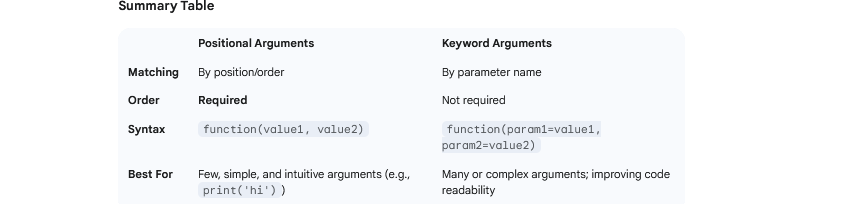

In [ ]:
def create_order(item, quantity, special_instructions="None"):
    """
    Creates an order for a specific item.
    - item: (positional) The name of the item.
    - quantity: (positional) The number of items.
    - special_instructions: (keyword) Any special requests.
    """
    print(f"Item: {item}")
    print(f"Quantity: {quantity}")
    print(f"Instructions: {special_instructions}")

# --- Using only positional arguments ---
# The first value ('Pizza') goes to 'item'
# The second value (2) goes to 'quantity'
print("Positional Call:")
create_order('Pizza', 2)
# Output:
# Item: Pizza
# Quantity: 2
# Instructions: None

# --- Mixing positional and keyword arguments ---
# Positional arguments must come first!
# The first value ('Burrito') goes to 'item'
# The second value (1) goes to 'quantity'
# The keyword argument explicitly sets 'special_instructions'
print("\nMixed Call:")
create_order('Burrito', 1, special_instructions="No onions")
# Output:
# Item: Burrito
# Quantity: 1
# Instructions: No onions

# --- Using only keyword arguments ---
# The order doesn't matter here
print("\nKeyword-Only Call:")
create_order(special_instructions="Extra cheese", quantity=3, item='Pasta')
# Output:
# Item: Pasta
# Quantity: 3
# Instructions: Extra cheese

Positional Call:
Item: Pizza
Quantity: 2
Instructions: None

Mixed Call:
Item: Burrito
Quantity: 1
Instructions: No onions

Keyword-Only Call:
Item: Pasta
Quantity: 3
Instructions: Extra cheese


*args is a special syntax in Python that allows us to pass a variable number of positional arguments to a function. The syntax to define a function with *args is as follows:

In [ ]:
def add(*args):
    res = 0
    for number in args:
        res += number
    return res

print(add(1, 2, 3, 4, 5)) # 15

15


**kwargs is a special syntax in Python that allows us to pass a variable number of keyword arguments to a function. The syntax to define a function with **kwargs is as follows:

In [ ]:
def product(**kwargs):
    result = 1
    for key, value in kwargs.items():
        result *= value
    return result

print(product(a = 2, b = 3, c = 4))   # 24

24


### Few Notes

Another nuance to keep in mind is that positional arguments must be passed before keyword arguments, and those keyword arguments must follow the order of the function definition:

In [ ]:
def greeting(name, title='Mr.'):
    return f'Hello, {title} {name}'


print(greeting('John', title='Dr.'))   # Hello, Dr. John
print(greeting(title='Dr.', 'John'))

SyntaxError: positional argument follows keyword argument (ipython-input-3038362617.py, line 6)

It is important to keep in mind a few nuances when working with default arguments in Python. First, default arguments are evaluated only once, at the time of function definition. This means that if you use a mutable object, such as a list or a dictionary, as a default argument, its value will persist between function calls, leading to unexpected results:

In [ ]:
def add_number(number, numbers=[]):
    numbers.append(number)
    return numbers

In [ ]:
print(add_number(1)) # [1]
print(add_number(2)) # [1, 2]

[1]
[1, 2]


To avoid this issue, you can use None as the default value, and check for it in the function body:

In [ ]:
def add_number(number, numbers=None):
    if numbers is None:
        numbers = []
    numbers.append(number)
    return numbers

print(add_number(1)) # [1]
print(add_number(2)) # [2]


[1]
[2]


# **25.Python Variable Scope. (30/100 Days of Python)**

There are two types of scopes in Python: global and local.

1. **Global scope**: Variables declared outside of any function or class are considered to be in the global scope. These variables can be accessed from anywhere in the program and are not limited to any particular function or class.
2. **Local scope**: Variables declared inside a function or class are considered to be in the local scope. These variables are only accessible within the function or class and cannot be accessed from outside

In [ ]:
x = 10 # global scope

def add_numbers():
    y = 20 # local scope
    result = x + y
    print(result)

add_numbers() # 30

30


It is important to note that variables with the same name can exist in both the global and local scopes, as long as they are used within their respective scopes.

If you want to access a global variable from within a function, you can use the global keyword:

In [ ]:
x = 10        # global scope

def add_numbers():
    global x
    x += 7    # access the global variable x
    print(x)

add_numbers() # 17

17


When working with nested scopes, the innermost scope takes precedence over the outer scopes. In other words, if a variable with the same name exists in both the inner and outer scopes, the inner scope’s variable will be used:

In [ ]:
x = 10             # global scope

def outer_function():
    x = 20         # outer local scope
    def inner_function():
        x = 30     # inner local scope
        print(x)
    inner_function()

outer_function()   # prints 30

30


The **nonlocal** keyword in Python is used to indicate that a variable is in an outer, but not global, scope. This keyword allows you to modify a variable in an outer local scope within a nested function:

In [ ]:
def outer_function():
  x = 58
  def inner_function():
    nonlocal x
    x = x + 10
  inner_function()
  print(x)

outer_function()

68


Suppose you are creating a program that keeps track of the number of times a button has been clicked on a website. To do this, you have a variable count that stores the number of clicks, which is defined in the global scope.

In [ ]:
count = 0 # global

def increment():
  global cont
  count += 1

def count():
  increment()

When you modify a global variable within a function, it can have unintended consequences for other parts of your program that rely on that variable. To avoid this, it’s a good practice to use local variables whenever possible and to limit the use of global variables to situations where it’s absolutely necessary.

In [ ]:
from datetime import date

#dates = [date(2017,11,5),date(2019,12,3)]

a = date(2017,11,5)
b = date(2019,12,3)
dates = [a ,b]
print(dates[0])
#YYYY-MM-DD


2017-11-05


In [ ]:
print(min(dates))

2017-11-05


In [ ]:
# subtract 2 dates
d = date(2017,1,5)
print(d.strftime("The year is %Y"))

The year is 2017


In [ ]:
from datetime import datetime
new_date = datetime(2017,10,1,15,23,45,500000)
print(new_date)


2017-10-01 15:23:45.500000


# **26.Dataclasses vs Classes. (31/100 Days of Python)**

In [ ]:
from dataclasses import dataclass

@dataclass
class User:
    name: str
    email: str


new_user = User("Julius","juliusnyambok14@gmail.com")
print(new_user.name)

Julius


# **25.Ingesting Data -- Using Pandas**

In [ ]:
import pandas as pd

urls = ["https://media.geeksforgeeks.org/wp-content/uploads/20250214163523124259/monthly_milk_production.csv"
        ,"https://media.geeksforgeeks.org/wp-content/uploads/20250214163523124259/monthly_milk_production.csv"]

dataframes = []
for url in urls:
  soccer_dfs = pd.read_csv(url)
  dataframes.append(soccer_dfs)

final_df = pd.concat(dataframes, ignore_index=True)
#final_df = pd.DataFrame(final_df)
final_df.shape

(336, 2)

# **26.Difference between args and kwargs**

Positional arguments are a type of argument passed to a function or method where the value is assigned to a parameter based on its position in the argument list, rather than by its name. The order in which the arguments are provided directly corresponds to the order of the parameters defined in the function's signature

In [ ]:
def func_with_arguments(args1,args2,*args):
  print(f'Args1 is {args1}')
  print(f'Args2 is {args2}')
  print(f'Args is {args}')


func_with_arguments(1,2,3,4,5,6)

Args1 is 1
Args2 is 2
Args is (3, 4, 5, 6)


*args (short for "arguments") allows a function to accept any number of positional arguments. When using *args, the extra positional arguments are collected into a tuple, which can then be iterated over or processed as needed. This feature is particularly useful when the number of arguments is not known in advance or can vary

In [ ]:
def greetings_with_arguements(args1,args2,*args):
  print(f"User's name is {args1}")
  print(f"User's email is {args2}")
  print(f"The user's favourite numbers is {args}")

greetings_with_arguements("Julius","juliusnyambok14@gmail.com",1,2,3,4,5,6)



User's name is Julius
User's email is juliusnyambok14@gmail.com
The user's favourite numbers is (1, 2, 3, 4, 5, 6)


Use cases for args


1.   **Handling Variable-Length Input** -  Functions that need to process an arbitrary number of items, like a summing function. print(sum_all(1, 2, 3, 4))
2.   **Creating Wrappers or Decorators** -To create decorators that can wrap functions with various argument lists.






In [ ]:
def wrapper(func):
    def inner(*args, **kwargs):
        print("Arguments received:", args)
        return func(*args, **kwargs)
    return inner

@wrapper
def add(x, y):
    return x + y

add(2, 3)  # Output: Arguments received: (2, 3)

Arguments received: (2, 3)


5

**kwargs (short for "keyword arguments") allows a function to accept any number of keyword arguments. These arguments are passed as a dictionary where the keys are the argument names and the values are the corresponding values.

This is useful when you want to handle named parameters dynamically and can be especially helpful for functions with many optional parameters.

In [ ]:
def greetings_with_kwargs(args1,args2,**kwargs):
  print(f"User's name is {args1}")
  print(f"User's email is {args2}")
  print(f"The user's favourite numbers is {kwargs}")

greetings_with_kwargs("Julius","juliusnyambok14@gmail.com",name="Julius",Age=20)

User's name is Julius
User's email is juliusnyambok14@gmail.com
The user's favourite numbers is {'name': 'Julius', 'Age': 20}


Use Cases for **kwargs:

*   **1. Handling Optional Parameters** - Functions that might need to accept many optional keyword arguments.



In [ ]:
def describe_person(name, **kwargs):
    description = f"Name: {name}"
    for key, value in kwargs.items():
        description += f", {key}: {value}"
    return description

print(describe_person("Alice", age=30, job="Engineer"))

Name: Alice, age: 30, job: Engineer



2.   **Dynamic Function Signatures** - Functions that need to handle various named arguments, especially in configurations or settings.



In [ ]:
def configure_settings(**settings):
    for key, value in settings.items():
        print(f"Setting {key} to {value}")

configure_settings(theme="dark", language="Python")

Setting theme to dark
Setting language to Python


You can use both *args and **kwargs in the same function definition. However, they must be used in a specific order: positional arguments first, followed by *args, and finally **kwargs.

# **27.Enumerate and Zip functions (31/100 Days of Python)**

**Enumerate** adds a counter to a loop through an iterable
starts with 0 by default but can be changed

In [ ]:
# Enumerate starting with 0 by default

fruits = ["apple", "banana", "cherry"]
for i, fruit in enumerate(fruits,1):
  print (i, fruit)

1 apple
2 banana
3 cherry


The **zip function** is used to combine two or more iterables into a single iterable. The items in the resulting iterable are formed by taking corresponding items from each iterable:

In [ ]:
fruits = ["apple", "banana", "cherry"]
color = ["red", "yellow"]
for fruit, color in zip(fruits, color):
  print (fruit, color)

apple red
banana yellow


'Cherry' won't be printed because the zip() function stops iterating as soon as the shortest of the input iterables is exhausted.

# **28.Lambda Functions in Python: A Comprehensive Guide to Understanding and Using Anonymous Functions (32/100 Days of Python)**

One of the common uses of lambda functions in Python is as arguments to higher-order functions such as map, filter, and reduce. These functions allow us to perform operations on lists and other iterables, making it easier to manipulate data. Let's look at each of these functions in detail.

##Using Lambda Functions with map##


In [ ]:
numbers = (1, 2, 3, 4, 5)
square = tuple(map(lambda x: x**2, numbers))
print(square) # [1, 4, 9, 16, 25]

(1, 4, 9, 16, 25)


##Using Lambda Functions with filter##
The filter function is another built-in Python function that takes a function and an iterable as arguments and returns a new iterable with only the elements for which the function returns True. For example, to get a list of even numbers from a list of numbers using a lambda function and filter, we would write the following code:

In [ ]:
numbers = [1, 2, 3, 4, 5]
evens = list(filter(lambda x: x % 2 == 0, numbers))
print(evens) # [2, 4]

[2, 4]


##Using Lambda Functions with reduce##
The reduce function is a built-in function from the functools module that takes a function and an iterable as arguments and returns a single value that is the result of applying the function cumulatively to the elements of the iterable. For example, to find the product of all the elements of a list of numbers using a lambda function and reduce, we would write the following code:

In [ ]:
from functools import reduce

numbers = [1, 2, 3, 4, 5]
product = reduce(lambda x, y: x * y, numbers)
print(product) # 120

While lambda functions are incredibly useful, they do have a few limitations that are important to keep in mind. One of the main limitations of lambda functions is that they can only contain a single expression. This means that they cannot contain statements or multiple lines of code. Additionally, the expression must be a valid expression in Python and must return a value. Another limitation is that lambda functions cannot contain any annotations or type hints.

# **29.Higher Order Functions in Python (33/100 Days of Python)**
A higher-order function is a function that can take other functions as arguments and/or return functions as outputs. These functions allow you to write more concise, flexible, and abstract code. Higher-order functions are often used to create new functions from existing functions, abstract common patterns in code, and write more modular and reusable code.

There are several higher-order functions in Python that are commonly used, such as map, filter, and reduce:

In [ ]:
numbers = [1,2,3,4,5]

def square_to_each(func, numbers):
  return [func(x) for x in numbers]

def square(x):
  return x * x

list_numbers = [1,2,3,4,5]
square_to_each(square,list_numbers)

[1, 4, 9, 16, 25]

Higher-order functions have several advantages over traditional functions in programming. One of the main advantages is that they allow you to write more abstract, flexible, and reusable code. Higher-order functions also make it easier to test and debug your code, as they help you break down complex problems into smaller, more manageable pieces.

Another advantage of higher-order functions is that they promote functional programming, a paradigm that emphasizes immutability, pure functions, and composability. By using higher-order functions, you can write code that is more modular, easy to reason about, and less prone to bugs.

Finally, higher-order functions allow you to write more concise code by eliminating repetitive or redundant code. You can use higher-order functions to abstract away common patterns in your code and make your code more readable and maintainable.

In [ ]:
utilities = [250,439,550,750]



from functools import reduce

product = reduce(lambda x, y: 2**(x + y), utilities)
print(product) # 120


# **30.With Statement in Python (34/100 Days of Python)**

In this example, the file example.txt is opened using the open function, and a reference to the file object is stored in the variable f. Within the with block, the contents of the file are read using the read method and stored in the variable contents. When the with block is exited, the file is automatically closed, even if an exception occurs.

In [ ]:
with open('example.txt', 'r') as f:
    contents = f.read()
    # Do something with the contents of the file

# **31. Positional-only and Keyword-only Arguments in Python (37/100 Days of Python)**

Positional-only arguments are a feature in Python that allows function parameters to be defined as positional-only, meaning they can only be passed to the function as positional arguments and cannot be passed as keyword arguments. This feature can be helpful in cases where the order of arguments is more important than their names, such as when processing images or performing geometry calculations. By using positional-only arguments, you can ensure that your functions are called with the correct arguments in the correct order, improving the clarity and maintainability of your code.

Positional-only arguments are separated with a forward slash (/) in the function definition. They can only be passed to a function as positional arguments and cannot be passed as keyword arguments. This can be useful in cases where the order of the arguments is more important than their names:

In [ ]:
def rectangle_area(length, width, /):
    return length * width

print(rectangle_area(10, 20))              # 200
print(rectangle_area(width=20, length=10))

200


TypeError: rectangle_area() got some positional-only arguments passed as keyword arguments: 'length, width'

Keyword-only arguments are a feature in Python that allows function parameters to be defined as keyword-only, meaning they can only be passed to the function as keyword arguments and cannot be passed as positional arguments. This feature can be useful when you want to enforce the use of keyword arguments for certain parameters, such as optional parameters that have a default value, or when you want to clearly distinguish between mandatory and optional arguments.

Keyword-only arguments are specified after an asterisk (*) in the function definition. They can only be passed to a function as keyword arguments and cannot be passed as positional arguments. This can be useful in cases where certain arguments have a default value and should be optional.

Consider a function that calculates the volume of a cylinder. The radius and height are required arguments, while the units are optional. In this case, the units argument can be specified as keyword-only.

In [ ]:
def cylinder_volume(radius, height, *, units='cm^3'):
    return f'{3.14 * (radius ** 2) * height} {units}'

print(cylinder_volume(10, 20))                       # 1256.0 cm^3
print(cylinder_volume(10, 20, units='mm^3'))         # 1256000.0 mm^3
print(cylinder_volume(radius=10, height=20))         # 1256.0 cm^3
print(cylinder_volume(10, height=20, units='mm^3'))  # 1256000.0 mm^3
#print(cylinder_volume(10, height=20, 20))

6280.0 cm^3
6280.0 mm^3
6280.0 cm^3
6280.0 mm^3


# **32. Does Python Have Pass-by-Value VS Pass-by-Reference Variables? (38/100 Days of Python)**
Pass by value refers to the way that a function’s arguments are passed to the function. In this method, the value of the argument is copied and passed to the function. If the argument is a primitive data type (such as a string or an integer), this means that the function cannot modify the original value. Instead, the function operates on a copy of the value.

This makes sure that the original data is not modified:

In [ ]:
def add(a):
  a+=1
  return a

a = 5
b = add(5)

print(a)
print(b)

5
6


Passing by reference, on the other hand, refers to the way that a function’s arguments are passed to the function. In this method, the function receives a reference to the original argument. This means that if the argument is a mutable data type (such as a list or a dictionary), the function can modify the original data:

In [ ]:
def append_to_list(lst):
    lst.append(1)
    return lst

a = [5]
b = append_to_list(a)
print(a)  # [5, 1] (the initial list was modified)
print(b)  # [5, 1] (so now both a and b have the same value)

[5, 1]
[5, 1]


In Python, variables can store values of different data types. These data types can be divided into two categories: mutable and immutable.

In both cases we had the same syntax for passing the variables to the function, yet, the final result was completely different. That happened because, in the initial example, the value passed to a function was an integer, which is an immutable data type, while the second example involved passing a list, which is a mutable data type.
So, in reality, Python doesn’t have a real notion of pass-by-value VS pass-by-reference variables (as other languages do — C++ is a great example). In Python, it comes down to the data types themselves. We can think of immutable variables as pass-by-value, while mutable ones as pass-by-reference.

# **33. Recursion in Python (39/100 Days of Python))**

A recursive function is a function that calls itself in its definition. This allows the function to repeat its actions until a specific condition is met. The key to understanding recursive functions is to understand the concept of recursion. Recursion is a technique for solving problems by breaking them down into smaller, more manageable sub-problems:

In [ ]:
def print_numbers(n):
    if n == 0:
        return
    print(n)
    print_numbers(n-1)
print_numbers(2)

2
1


In this example, the print_numbers function takes an argument n and prints the numbers from n to 1. The function checks if n is equal to 0. If n is equal to 0, the function execution stops. If n is not equal to 0, the function prints the value of n and then calls itself with n-1. This continues until n is equal to 0 and the function returns. So, if we call print_numbers(5), it will print 5 4 3 2 1 each on a separate line.

Recursive functions are useful in a variety of different contexts. One common use case for recursive functions is when you need to perform a complex calculation on a nested structure. A great example is traversing data structures like trees or lists. For example, you could use a recursive function to traverse a tree structure and find all of the leaf nodes.

Using recursive functions in Python is actually quite straightforward. The basic idea is to create a function that calls itself until a specific condition is met. As an example, let’s calculate the factorial of n.

In [ ]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)


factorial(12)

479001600

If we forget to have a condition for stopping, we might end up with an infinitely running code or a stack overflow

When using recursive functions in Python, it is important to keep the following tips in mind:

1. Make sure that the base case is well-defined and will stop the recursion at some point. Otherwise, the code might end up running forever.
2. Make sure that the recursive step gets closer to the base case each time the function is called.
3. Keep the number of recursive calls to a minimum to avoid stack overflow errors.

# **34. What is Stack Overflow Really? (40/100 Days of Python)**

Stack overflow is a common software programming error that occurs when a program exceeds the maximum amount of memory that is allocated for its execution.
This can happen when a program is written in a way that allows function calls to be repeated indefinitely, leading to a buildup of function calls and data on the call stack. As the stack memory becomes exhausted, a stack overflow error will occur, causing the program to crash or produce unexpected results. This error is especially common in programming languages that use a stack-based model for function calls and data management, such as Python, C, and C++. Understanding the causes and avoiding stack overflow errors are crucial for writing efficient and stable software programs.

When working with functions, the program keeps track of their state — what variables were passed to the function, the values of different variables defined inside the function, etc. The whole information about that state is stored in a stack.

In [ ]:
def function1(n):
    if n <= 0:
        return
    else:
        print(f'Function 1 called with n = {n}')
        function2(n - 1)     ## Once it reaches n = 0 the first time, it will go into function2's base case for recursion
        print(f'Returning from Function 1 with n = {n}')

def function2(n):
    if n <= 0:
        return
    else:
        print(f'Function 2 called with n = {n}')
        function1(n - 1)
        print(f'Returning from Function 2 with n = {n}')

function1(3)

Function 1 called with n = 3
Function 2 called with n = 2
Function 1 called with n = 1
Returning from Function 1 with n = 1
Returning from Function 2 with n = 2
Returning from Function 1 with n = 3


At each point, the call stack only contains information about the active functions, and as each function returns, its information is removed from the stack.

In [ ]:
import sys
sys.setrecursionlimit(10**6)

In [ ]:
def recursive_function(n):
    if n <= 0:
        return 'The End!'
    else:
        return recursive_function(n-1)

#
recursive_function(10)     # This is okay
recursive_function(10000)

'The End!'

In [ ]:
def large_data_structure(n, data):
    if n == 10:
        return data
    data = data + (n,)
    return large_data_structure(n + 1, data)

large_data_structure(0, tuple())      # OK -> (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
large_data_structure(-1000, tuple())

RecursionError: maximum recursion depth exceeded

1. Use iterative solutions (using loops) instead of recursive solutions where possible. In some cases, iterative solutions can even be faster than recursive ones. This can help reduce the size of the call stack and avoid stack overflow errors.
2. Limit the recursion depth by adding a maximum recursion limit to your code. This can prevent the call stack from growing indefinitely and causing a stack overflow error.
3. Make sure the code actually stops at some point. Add proper exit conditions to your recursive functions. This ensures that the recursion will eventually stop and that the call stack will be cleared.
4. Increase the allowed recursion depth if necessary. This will make sure the functions can be called many times before hitting a maximum recursion depth exceeded error.

# **35. Analysing the behaviour of the finally keyword**

In [ ]:
a = 3
r = "n"
try:
  a + r
#except Exception as e:
  #print(e)
finally:
  print("Finally")

Finally


TypeError: unsupported operand type(s) for +: 'int' and 'str'

# **35. Regular Expressions in Python — Deep Dive (41/100 Days of Python)**
Regular expressions are a sequence of characters that define a search pattern. They are often used to perform operations on strings, such as searching for specific patterns, replacing substrings, and validating data. Python provides a module called re that provides functions for working with regular expressions.

**Using Metacharacters in Python**


Metacharacters are special characters that have a special meaning in regular expressions. They are used to match specific patterns in text. Some of the most commonly used metacharacters in Python include:

.: Matches any character except a newline
^: Matches the start of a string
$: Matches the end of a string
[]: Matches any character within the square brackets
[^ ]: Matches any character not within the square brackets
\w: Matches any word character (alphanumeric)
\d: Matches any decimal digit
\s: Matches any whitespace character
\b: Matches a word boundary
( ): Matches the expression within the parentheses
|: Matches either the expression before or after the | symbol

In [ ]:
import re
text = 'Hello 123 World 456 Hello World'

# match any character except a newline
if re.search('. World', text):
    print('Match found!')
else:
    print('No match found.')

# match the start of a string
if re.search('^Hello', text):
    print('Match found!')
else:
    print('No match found.')

# match the end of a string
if re.search('Hello World$', text):
    print('Match found!')
else:
    print('No match found.')

# match any character within the square brackets
if re.search('[0123456789]', text):
    print('Match found!')
else:
    print('No match found.')

# match any character not within the square brackets
if re.search('[^0123456789]', text):
    print('Match found!')
else:
    print('No match found.')

# match any word character (alphanumeric)
if re.search('\w+', text):
    print('Match found!')
else:
    print('No match found.')

# match any decimal digit
if re.search('\d+', text):
    print('Match found!')
else:
    print('No match found.')

# match any whitespace character
if re.search('\s+', text):
    print('Match found!')
else:
    print('No match found.')

# match a word boundary
if re.search(r'\bHello\b', text):
    print('Match found!')
else:
    print('No match found.')


# match either the expression before or after the | symbol
if re.search('Hello World|Hello 123', text):
    print('Match found!')
else:
    print('No match found.')


Match found!
Match found!
Match found!
Match found!
Match found!
Match found!
Match found!
Match found!
Match found!
Match found!


<>:35: SyntaxWarning: invalid escape sequence '\w'
<>:41: SyntaxWarning: invalid escape sequence '\d'
<>:47: SyntaxWarning: invalid escape sequence '\s'
<>:35: SyntaxWarning: invalid escape sequence '\w'
<>:41: SyntaxWarning: invalid escape sequence '\d'
<>:47: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-40125301.py:35: SyntaxWarning: invalid escape sequence '\w'
  if re.search('\w+', text):
/tmp/ipython-input-40125301.py:41: SyntaxWarning: invalid escape sequence '\d'
  if re.search('\d+', text):
/tmp/ipython-input-40125301.py:47: SyntaxWarning: invalid escape sequence '\s'
  if re.search('\s+', text):


Special sequences in Python are sequences of characters that have a special meaning in regular expressions. Some of the most commonly used special sequences include:

\A: — Matches the start of the string
\b: Matches a word boundary
\B: Matches a non-word boundary
\d: Matches any decimal digit
\D: Matches any non-digit character
\s: Matches any whitespace character
\S: Matches any non-whitespace character
\w: Matches any word character (alphanumeric)
\W: Matches any non-word character

In [ ]:
text = 'Hello 123 World 456 Hello World'

# match the start of the string
if re.search(r'\AHello', text):
    print('Match found!')
else:
    print('No match found.')

# match a word boundary
if re.search(r'\bHello\b', text):
    print('Match found!')
else:
    print('No match found.')

# match a non-word boundary
if re.search(r'\BHello\B', text):
    print('Match found!')
else:
    print('No match found.')

# match any decimal digit
if re.search(r'\d+', text):
    print('Match found!')
else:
    print('No match found.')

# match any non-digit character
if re.search(r'\D+', text):
    print('Match found!')
else:
    print('No match found.')

# match any whitespace character
if re.search(r'\s+', text):
    print('Match found!')
else:
    print('No match found.')

# match any non-whitespace character
if re.search(r'\S+', text):
    print('Match found!')
else:
    print('No match found.')

# match any word character (alphanumeric)
if re.search(r'\w+', text):
    print('Match found!')
else:
    print('No match found.')

# match any non-word character
if re.search(r'\W+', text):
    print('Match found!')
else:
    print('No match found.')

Match found!
Match found!
No match found.
Match found!
Match found!
Match found!
Match found!
Match found!
Match found!


# **36. Regular Expressions — Grouping and Backreferences (42/100 Days of Python)**

In this tutorial, we will be exploring the concepts of grouping and backreferences in regular expressions, including how to search and modify strings using these features. Regular expressions, also known as “regex” or “regexp”, are a powerful tool for pattern matching and string manipulation. With the help of grouping and backreferences, you can make your regular expressions even more versatile and efficient.

In [ ]:
import re

text = 'John Doe: john.doe@example.com, Jane Doe: jane.doe@example.com'

# Find: word boundary (\b) + word (\w+) + dot (\.) + word (\w+)
#        + at (@) + word (\w+) + word boundary (\b)
emails = re.findall(r'\b\w+\.\w+@\w+\.\w+\b', text)
print(emails)
# ['john.doe@example.com', 'jane.doe@example.com']

['john.doe@example.com', 'jane.doe@example.com']


In this example, the regular expression r'\b\w+\.\w+@\w+\.\w+\b' is used to match all the email addresses in the text variable. The \b symbols are word boundaries, which indicate the start and end of a word. The \w+ symbols match any word characters, and the \. symbol matches the dot. By grouping the characters together using parentheses, we can match the username, domain, and top-level domain as separate units:

Backreferences in regular expressions allow you to reuse a matched pattern in the same expression. In other words, you can reference a captured group in your pattern to match an exact copy of the text it captured. This can be particularly useful when you want to match a pattern multiple times within a string or when you want to modify a string based on a pattern match. Backreferences are indicated using the backslash \ followed by a number that corresponds to the group number or using the backslash and \g<num> where num is the group number:

In [ ]:
import re

text = 'John has a cat named Mittens'
animal_pattern = r'(\w+) has a (\w+) named (\w+)'
match = re.search(animal_pattern, text)

if match:
    animal_type = match.group(2)    # cat
    animal_name = match.group(3)    # Mittens
    new_text = re.sub(animal_pattern, f'{animal_type.capitalize()} named {animal_name.capitalize()} belongs to \g<1>', text)
    print(new_text)


Cat named Mittens belongs to John


<>:10: SyntaxWarning: invalid escape sequence '\g'
<>:10: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipython-input-3378179494.py:10: SyntaxWarning: invalid escape sequence '\g'
  new_text = re.sub(animal_pattern, f'{animal_type.capitalize()} named {animal_name.capitalize()} belongs to \g<1>', text)


In these examples, re.sub() is used to replace all the matches of a specified pattern in the text variable with a value that contains backreferences to the captured groups in the match. The resulting modified strings are then printed.

By using grouping and backreferences in regular expressions, you can perform complex string manipulations with ease. The possibilities are endless, and with a little creativity and experimentation, you can achieve great results.

In [ ]:
import re

# Example 1
text = 'John Doe: john.doe@example.com, Jane Doe: jane.doe@example.com'
email_pattern = r'(\b\w+)\.(\w+)@(\w+)\.(\w+)\b'
new_text = re.sub(email_pattern, r'\1_\2@\3.\4', text)
print(new_text)
# John Doe: john_doe@example.com, Jane Doe: jane_doe@example.com

# Example 2
text = 'John was born in 1980 and Jane was born in 1985'
birth_pattern = r'(\w+) was born in (\d+)'
new_text = re.sub(birth_pattern, r'\2: \1', text)
print(new_text)
# 1980: John and 1985: Jane

# Example 3
text = 'John: 123, Jane: 456, Bob: 789'
numbers_pattern = r'(\w+): (\d+)'
new_text = re.sub(numbers_pattern, r'\2: \1', text)
print(new_text)
# 123: John, 456: Jane, 789: Bob

John Doe: john_doe@example.com, Jane Doe: jane_doe@example.com
1980: John and 1985: Jane
123: John, 456: Jane, 789: Bob


# **37. Python Classes and Objects (43/100 Days of Python)**
Python is a powerful and flexible programming language that is widely used for a variety of applications. One of the most important concepts in Python is object-oriented programming (OOP), which is used to model real-world scenarios in code. In this tutorial, we will explore the basics of classes and objects in Python, including what they are, how they work, and how to use them to create real-world examples.

## What is a Class in Python?

A class in Python is a blueprint for creating objects. It defines the attributes and methods that the objects created from it will have. A class serves as a template for creating multiple objects that share the same attributes and methods. Classes are created using the class keyword in Python:



In [ ]:
class Dog:
    def __init__(self, name, breed):
        self.name = name
        self.breed = breed

    def bark(self):
        print(f'{self.name} barks!')

The above class, Dog, has two attributes: name and breed, and a method called bark. The __init__ method is a special method in Python classes that is called when an object is created from the class. The self keyword is a reference to the instance of the object that is being created. In other words, self refers to the specific object that is being created from the class.


In [ ]:
dog = Dog('Loby', 'Labrador')
print(dog.name)    # 'Loby'
print(dog.breed)   # 'Labrador'
dog.bark()         # 'Loby barks!'

Loby
Labrador
Loby barks!


The self keyword is a special parameter that is passed to every method in a class in Python. It refers to the instance of the class, and is used to access the attributes and methods of that instance. So, the self keyword “keeps track” of the current object.

In the Dog class defined earlier, the self parameter is used to access the name attribute. Without self, the code would not know which instance of the class it is referring to, and the attributes and methods of the class would not be accessible.

The self parameter is automatically passed to the method when it is called on an instance of the class. For example, when we call dog.bark(), Python automatically passes dog as the value of self to the bark method. This allows the method to access and manipulate the attributes of the instance:

**Naming Conventions for Classes in Python**

Class and method naming in Python follow certain conventions to make the code readable and understandable to other developers. In Python, it is recommended to use the CamelCase naming convention for class names, which means that each word in the class name starts with a capital letter, with no underscores. For example, a class named Book or Textbook is written in the correct naming convention, while book or Text_book isn’t.

For method names, it is recommended to use snake_case, which means that all words in the method name are separated by underscores, and all letters are in lowercase. The method names should also be descriptive and indicate what the method does. For example, check_out and check_in are well-named methods for the Book class, while checkOut or CheckOut are not.

Another convention in Python is to use the double underscores (__) prefix for special methods such as __init__. These special methods have specific purposes and are used in the implementation of Python's OOP features. For example, the __init__ method is used to initialize the attributes of an object when it is created, and the __str__ method is used to define the string representation of an object.

By following these naming conventions and principles, we can create clean and readable code that is easy to understand and maintain.

# **39. What are Magic Methods in Python Classes? (45/100 Days of Python)**

Magic methods in Python classes are denoted by a double underscore prefix and a double underscore suffix. For example, the method for defining the behavior of the + operator is called __add__. The magic methods are called automatically by the Python interpreter when a specific operation is performed on an object of the class. Here are some of the most commonly used magic methods in Python classes:

1. **__init__:** This method is called when an object of the class is created. It is used to initialize the attributes of the class.
2. **__str__:** This method is called when the str() function is applied to an object of the class. It is used to return a string representation of the object.
3. **__len__:** This method is called when the len() function is applied to an object of the class. It is used to return the length of the object.
4. **__add__:** This method is called when the + operator is applied to two objects of the class. It is used to define the behavior of the addition operator for the class.
5. **__eq__:** This method is called when the == operator is applied to two objects of the class. It is used to define the behavior of the equality operator for the class.
6. **__iter__:** This method is called when the iter() function is applied to an object of the class. It is used to make the object iterable.

In [ ]:
class Vector:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __str__(self):
        return f'Vector({self.x}, {self.y})'

    def __add__(self, other):
        x = self.x + other.x
        y = self.y + other.y
        return Vector(x, y)
vector1 = Vector(1, 2)
vector2 = Vector(3, 4)
vector3 = vector1 + vector2
print(vector3)   # Vector(4, 6)

Vector(4, 6)


# **40. Inheritance in Python? (46/100 Days of Python)**

Inheritance is a fundamental concept in object-oriented programming (OOP) that allows you to create a new class that is a modified version of an existing class. The new class is called the derived class, and the existing class is called the base class. Inheritance enables you to reuse code and promote code reuse, making it easier to maintain and extend code.

In Python, inheritance works by defining a derived class that inherits from a base class. The derived class inherits all of the attributes and behaviors of the base class and can also add new attributes and behaviors, or override existing ones.

In [ ]:
class Animal:
    def __init__(self, name, species):
        self.name = name
        self.species = species

    def make_sound(self):
        print('Some generic animal sound')

To define a derived class in Python, you create a new class and inherit from the base class using parentheses. For example, the following code defines a derived class called Dog that inherits from the Animal class:

In [ ]:
class Dog(Animal):
    def __init__(self, name, breed):
        super().__init__(name, species='Dog')
        self.breed = breed

    def make_sound(self):
        print('Woof!')

Here, the Dog class has a new attribute, breed, and a new implementation of the make_sound method. The Dog class also calls the __init__ method of the Animal class to initialize the name and species attributes.

Notice that the __init__() function of the base class is called using the super() method. The super call in the __init__ function is used to call the __init__ method of the base class in a derived class. The super call is a convenient way to call the __init__ method of the base class without having to specify the name of the base class. An alternative to using the super() method, would’ve been to call the base class by name:

In [ ]:
class Dog(Animal):
    def __init__(self, name, breed):
        Animal.__init__(self, name, species='Dog')
        self.breed = breed

    def make_sound(self):
        print('Woof!')

In [ ]:
dog = Dog('Loby', 'Labrador')
dog.make_sound()
print(dog.breed)     # Labrador
print(dog.species)   # Dog
print(dog.name)

Woof!
Labrador
Dog
Loby


# **41. Stop Using Lambda for Conditional Column Creation in Pandas! Use this instead.**

In [ ]:
import pandas as pd
import numpy as np
import timeit

# 1. Setup: Create a large DataFrame (1 million rows)
df_size = 1_000_000
df = pd.DataFrame({
    'Value': np.random.rand(df_size) * 100,
})

# Define the condition: Value > 50

# --- Function 1: Using np.where (Vectorized) ---
time_np_where = timeit.timeit(
    lambda: np.where(df['Value'] > 50, 'High', 'Low'),
    number=10
)

# --- Function 2: Using df.apply(lambda) (Row-Wise Iteration) ---
time_lambda = timeit.timeit(
    lambda: df['Value'].apply(lambda x: 'High' if x > 50 else 'Low'),
    number=10
)

# --- Results Output ---
print(f"Dataset Size: {df_size} rows, tested 10 times.\n")
print(f"1. np.where (Vectorized): {time_np_where:.4f} seconds")
print(f"2. df.apply(lambda):    {time_lambda:.4f} seconds")

# Calculate the speed difference
speed_difference = time_lambda / time_np_where
print(f"\nConclusion: np.where was {speed_difference:.1f}x faster.")

Dataset Size: 1000000 rows, tested 10 times.

1. np.where (Vectorized): 0.1344 seconds
2. df.apply(lambda):    6.6080 seconds

Conclusion: np.where was 49.2x faster.


# **42. Method Overriding in Python**
One of the key features of inheritance is the ability to override methods in a subclass, which means that you can provide a new implementation of a method in a subclass that replaces or extends the implementation in the parent class. This can be used to customize the behavior of a class to meet the specific needs of your application.

To override a method in a Python class, you simply create a new method with the same name in the subclass. When you create an instance of the subclass, Python will use the implementation of the method in the subclass, instead of the parent class:

In [1]:
class Shape:
  def area(self):
    raise NotImplementedError

In this example, we have a parent class Shape that defines an abstract method area(). An abstract method is a method that is declared in the parent class, but does not have an implementation. The NotImplementedError exception is raised to indicate that the method should be overridden in a subclass. There are other ways of defining abstract classes in Python, but for now, we’ll stick to the raise NotImplementedError implementation.

In [2]:
class Circle(Shape):
  def __init__(self,radius):
    self.radius = radius

  def area(self):
    return 3.14 * (self.radius**2)

circle = Circle(10)
print(circle.area())

314.0


Benefits of Overriding Methods
Overriding methods in Python classes provides several benefits, including:

1.  Customization: You can tailor the behavior of a class to meet the specific needs of your application, without having to modify the original implementation in the parent class.
2.  Reusability: You can reuse the implementation of a method in a parent class in multiple subclasses, while still allowing for customization when necessary.
3.  Abstraction: You can define abstract methods in a parent class that provide a general outline of the behavior that should be implemented in subclasses, without having to provide a specific implementation. This allows you to write code that is more flexible and easier to maintain.

In [4]:
from math import pi


class Shape:
    def area(self):
        raise NotImplementedError


class Circle(Shape):
    def __init__(self, radius):
        self.radius = radius

    def area(self):
        return pi * self.radius ** 2


class Cylinder(Circle):
    def __init__(self, radius, height):
        super().__init__(radius)
        self.height = height

    def area(self):
        base_area = super().area()
        return base_area * self.height


cylinder = Cylinder(10, 20)
print(cylinder.area())  # 6283.185307179587

6283.185307179587


In this example, the Circle class overrides the area() method in the Shape class to return a float value that represents the area of a circle.

The Cylinder class then inherits from Circle, and overrides the area() method to return a float value that represents the total surface area of a cylinder. The base_area variable is calculated by calling the area() method on the parent class, using the super() function.

When you create an instance of the Cylinder class, you pass in the radius and height of the cylinder, and the area() method returns the total surface area of the cylinder, as calculated by the implementation in the Cylinder class.

In your code, super().__init__(radius) does two things:

Calls the Parent: It triggers the __init__ method of the Circle class.

Sets State: It ensures the radius is initialized and saved to the object (self.radius = radius) without you having to rewrite that logic inside Cylinder.

Basically, it tells Python: "Go run the setup steps already defined in my parent class first."